<a href="https://colab.research.google.com/github/ScriptSherpa/TrackCount360-YOLO-Based-Object-Tracking-Directional-Counting-System/blob/main/Drone_YOLOv8_Train_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drone YOLOv8 Train/Predict w/mAP Evaluation

### About Mean Average Precision (mAP)

This is the most common metric for evaluating object detection models. mAP calculates the average precision across all classes. It measures how well the model's predicted bounding boxes match the ground truth bounding boxes, considering both the precision (how many of the predicted boxes are correct)

In [ ]:
!rm -rf *

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
train_path='/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train'
valid_path='/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid'
test_path='/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid'

# Create yaml file

In [ ]:
import yaml

data_yaml = dict(
    train =train_path,
    val =valid_path,
    test=test_path,
    nc =1,
    names =['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat data.yaml

{names: [drone], nc: 1, test: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid,
  train: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train, val: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid}


    names =['drone']
    M=list(range(len(names)))
    class_map=dict(zip(M,names))

# Train

In [ ]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 315MB/s]


In [ ]:
import yaml
import os

# Update paths to use Kaggle input directory
train_path = '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train'
valid_path = '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid'
test_path = '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid'

# Copy the dataset to the working directory
!mkdir -p /kaggle/working/drone_dataset/train
!mkdir -p /kaggle/working/drone_dataset/valid
!cp -r {train_path}/* /kaggle/working/drone_dataset/train/
!cp -r {valid_path}/* /kaggle/working/drone_dataset/valid/

# Update data_yaml to point to the copied dataset
data_yaml = dict(
    train = '/kaggle/working/drone_dataset/train',
    val = '/kaggle/working/drone_dataset/valid',
    test = '/kaggle/working/drone_dataset/valid',
    nc = 1,
    names = ['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat data.yaml

{names: [drone], nc: 1, test: /kaggle/working/drone_dataset/valid, train: /kaggle/working/drone_dataset/train,
  val: /kaggle/working/drone_dataset/valid}


In [ ]:
import yaml

# Update paths to use Kaggle input directory
train_path = '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train'
valid_path = '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid'
test_path = '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid'

data_yaml = dict(
    train = train_path,
    val = valid_path,
    test = test_path,
    nc = 1,
    names = ['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat data.yaml

{names: [drone], nc: 1, test: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid,
  train: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train, val: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid}


In [ ]:
from ultralytics import YOLO

# Initialize the model
model = YOLO('yolov8x.pt')

# Train the model
model.train(
    data='data.yaml',
    epochs=20,
    imgsz=480,
    patience=5,
    workers=0
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torch

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/drone_dataset/train/labels... 1012 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<00:00, 1243.40it/s]

train: WARNING ⚠️ /kaggle/working/drone_dataset/train/images/pic_722.jpg: corrupt JPEG restored and saved
train: New cache created: /kaggle/working/drone_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/drone_dataset/valid/labels... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:00<00:00, 1404.46it/s]

val: New cache created: /kaggle/working/drone_dataset/valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.64G      1.636      2.066      1.814         11        480: 100%|██████████| 64/64 [01:07<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:11<00:00,  1.02s/it]

                   all        347        369    0.00254       0.42    0.00183   0.000541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      9.32G      1.839      1.896      1.893          9        480: 100%|██████████| 64/64 [01:06<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369     0.0104      0.238    0.00483    0.00122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.35G      1.816       1.92      1.851         10        480: 100%|██████████| 64/64 [01:06<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.10it/s]

                   all        347        369    0.00384      0.482    0.00284   0.000967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       9.4G      1.745      1.791      1.815         11        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]

                   all        347        369      0.117     0.0678     0.0416     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.45G      1.681      1.692      1.739          8        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.166      0.339       0.14     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.58G      1.609      1.599      1.697          9        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]

                   all        347        369      0.592      0.526      0.525      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      10.2G      1.548        1.5       1.64         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.755      0.543      0.623      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      10.4G      1.505      1.477      1.611         10        480: 100%|██████████| 64/64 [01:06<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.10it/s]

                   all        347        369      0.681      0.602      0.595      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20        11G      1.493      1.397      1.581         15        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369      0.694      0.618      0.678      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      11.3G      1.452      1.331       1.55         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]

                   all        347        369      0.776      0.686      0.728      0.422


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      11.8G       1.37      1.182      1.541          5        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.10it/s]

                   all        347        369      0.711      0.612      0.644      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20        12G       1.34      1.052      1.539          5        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.10it/s]

                   all        347        369      0.841      0.667       0.76      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.6G      1.297     0.9469      1.491          4        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.814      0.602      0.697      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.8G      1.244     0.9257      1.442          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]

                   all        347        369      0.786      0.683      0.764      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.4G      1.183     0.8688      1.391          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.14it/s]

                   all        347        369      0.877      0.726      0.826      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.89G      1.162     0.8308      1.389          4        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.10it/s]

                   all        347        369      0.855      0.721      0.818      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      9.52G      1.156     0.7865      1.349          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.826      0.745       0.83      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.52G      1.108     0.7519      1.328          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]

                   all        347        369       0.85      0.764      0.852      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      9.52G      1.082     0.7202      1.309          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.888      0.745      0.835      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.52G       1.05     0.6879      1.289          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]

                   all        347        369       0.89      0.786      0.865      0.505



20 epochs completed in 0.458 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.01it/s]


                   all        347        369       0.89      0.786      0.865      0.506
Speed: 0.1ms preprocess, 10.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7833353e58d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

# Load model from last checkpoint
model = YOLO('runs/detect/train4/weights/last.pt')

# Continue training from this checkpoint to 50 epochs
model.train(
    data='data.yaml',
    epochs=50,       # It will now go till 50 total (not +50)
    imgsz=480,
    patience=10,
    workers=0
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train4/weights/last.pt, data=data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

train: Scanning /kaggle/working/drone_dataset/train/labels.cache... 1012 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/drone_dataset/train/images/pic_722.jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/drone_dataset/valid/labels.cache... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:00<?, ?it/s]

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.12G      1.318       1.15      1.453         11        480: 100%|██████████| 64/64 [01:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.753      0.709      0.763      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.78G      1.402      1.188      1.502          9        480: 100%|██████████| 64/64 [01:06<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.15it/s]

                   all        347        369      0.701      0.564       0.61      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.81G      1.446      1.226      1.528         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369     0.0259      0.672     0.0222     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.86G      1.436      1.247      1.526         11        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.771      0.678      0.727      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.91G      1.425      1.218      1.503          8        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369      0.684      0.504      0.536      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.2G      1.408      1.197      1.504          9        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.806      0.631      0.719      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.7G      1.364      1.189      1.483         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.847      0.661      0.767      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.7G      1.389      1.186      1.508         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.759      0.715      0.755      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.7G      1.356      1.125       1.46         15        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369      0.825      0.612      0.723      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.7G      1.331      1.082      1.442         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.739      0.734      0.764      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.7G      1.347      1.107      1.473          6        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.10it/s]

                   all        347        369      0.795      0.607      0.708      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.7G      1.319      1.045      1.435         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369       0.82      0.717      0.818      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.7G      1.281      1.007      1.418         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.773      0.738      0.786      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.7G      1.282      1.012      1.406          6        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369       0.78      0.634      0.737      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.7G      1.264     0.9879        1.4          6        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.17it/s]

                   all        347        369       0.84      0.599      0.729      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.7G      1.269      0.986      1.398         11        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.15it/s]

                   all        347        369      0.873       0.67      0.766      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.7G      1.215     0.9527      1.363         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.774      0.789      0.811      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.7G      1.243     0.9381       1.38         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369       0.83      0.802      0.859      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.8G      1.216     0.9165      1.363          9        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.866      0.756      0.846      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.8G      1.212     0.9314      1.354          7        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.15it/s]

                   all        347        369      0.819      0.767       0.83      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.8G      1.165     0.8828      1.333          9        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.907      0.797      0.887      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.8G      1.189     0.9078      1.347          8        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.14it/s]

                   all        347        369      0.811      0.756      0.812      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.8G      1.171     0.8581      1.326         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369       0.82      0.813      0.846      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.8G      1.148     0.8396      1.313         13        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369      0.772      0.751      0.821      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.8G      1.131     0.8246      1.298          6        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.14it/s]

                   all        347        369      0.865      0.824      0.881       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.8G      1.136     0.8142      1.312         11        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.896      0.827      0.879      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.8G      1.138     0.8035      1.309          8        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369      0.885      0.769      0.851        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.8G      1.115     0.7756      1.296         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.14it/s]

                   all        347        369      0.851      0.797      0.837      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.8G        1.1     0.7767       1.29         12        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369       0.89      0.835      0.897      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.8G      1.074     0.7544      1.273         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.821      0.829      0.862       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.8G      1.097     0.7617       1.29         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.15it/s]

                   all        347        369      0.897      0.778       0.87      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.8G      1.081     0.7598      1.279          9        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.889      0.816      0.893      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.8G      1.086     0.7395      1.281         11        480: 100%|██████████| 64/64 [01:06<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369       0.89      0.875      0.906      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.8G       1.06     0.7161      1.255         12        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.862      0.835      0.883      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.8G      1.055     0.7188      1.259         10        480: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.17it/s]

                   all        347        369      0.929      0.835      0.903      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.8G       1.05     0.7238      1.263         11        480: 100%|██████████| 64/64 [01:06<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369       0.85      0.846      0.873      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.8G      1.039     0.7153      1.251         14        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.927      0.862      0.919      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.8G      1.029     0.6828      1.249          7        480: 100%|██████████| 64/64 [01:06<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.17it/s]

                   all        347        369      0.876      0.863      0.906      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.8G      1.001      0.683      1.226         13        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.896       0.87      0.912      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.8G      1.004      0.671      1.229          6        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

                   all        347        369      0.907      0.876      0.927       0.56


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.8G     0.8921     0.4972      1.173          4        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.17it/s]

                   all        347        369      0.906      0.866      0.923      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.8G     0.8405     0.4782      1.138          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

                   all        347        369      0.921      0.837      0.916      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.9G     0.8437     0.4691      1.136          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.17it/s]

                   all        347        369      0.935      0.821      0.915      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.9G     0.8154     0.4448      1.126          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.919      0.864      0.921      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.9G     0.8002     0.4372      1.109          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.941      0.867       0.93      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.9G     0.7828     0.4331      1.107          4        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369      0.949      0.856      0.935      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.9G     0.7641     0.4147      1.094          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.17it/s]

                   all        347        369       0.92       0.87       0.92      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.9G     0.7848     0.4123      1.093          4        480: 100%|██████████| 64/64 [01:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

                   all        347        369      0.906      0.883      0.924      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.9G     0.7369     0.3943      1.076          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]

                   all        347        369      0.936      0.862      0.922      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.9G     0.7213     0.3955      1.069          4        480: 100%|██████████| 64/64 [01:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]

                   all        347        369       0.93       0.86      0.924      0.555



50 epochs completed in 1.248 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 136.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]


                   all        347        369      0.906      0.883      0.924      0.569
Speed: 0.1ms preprocess, 10.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78334e07c550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

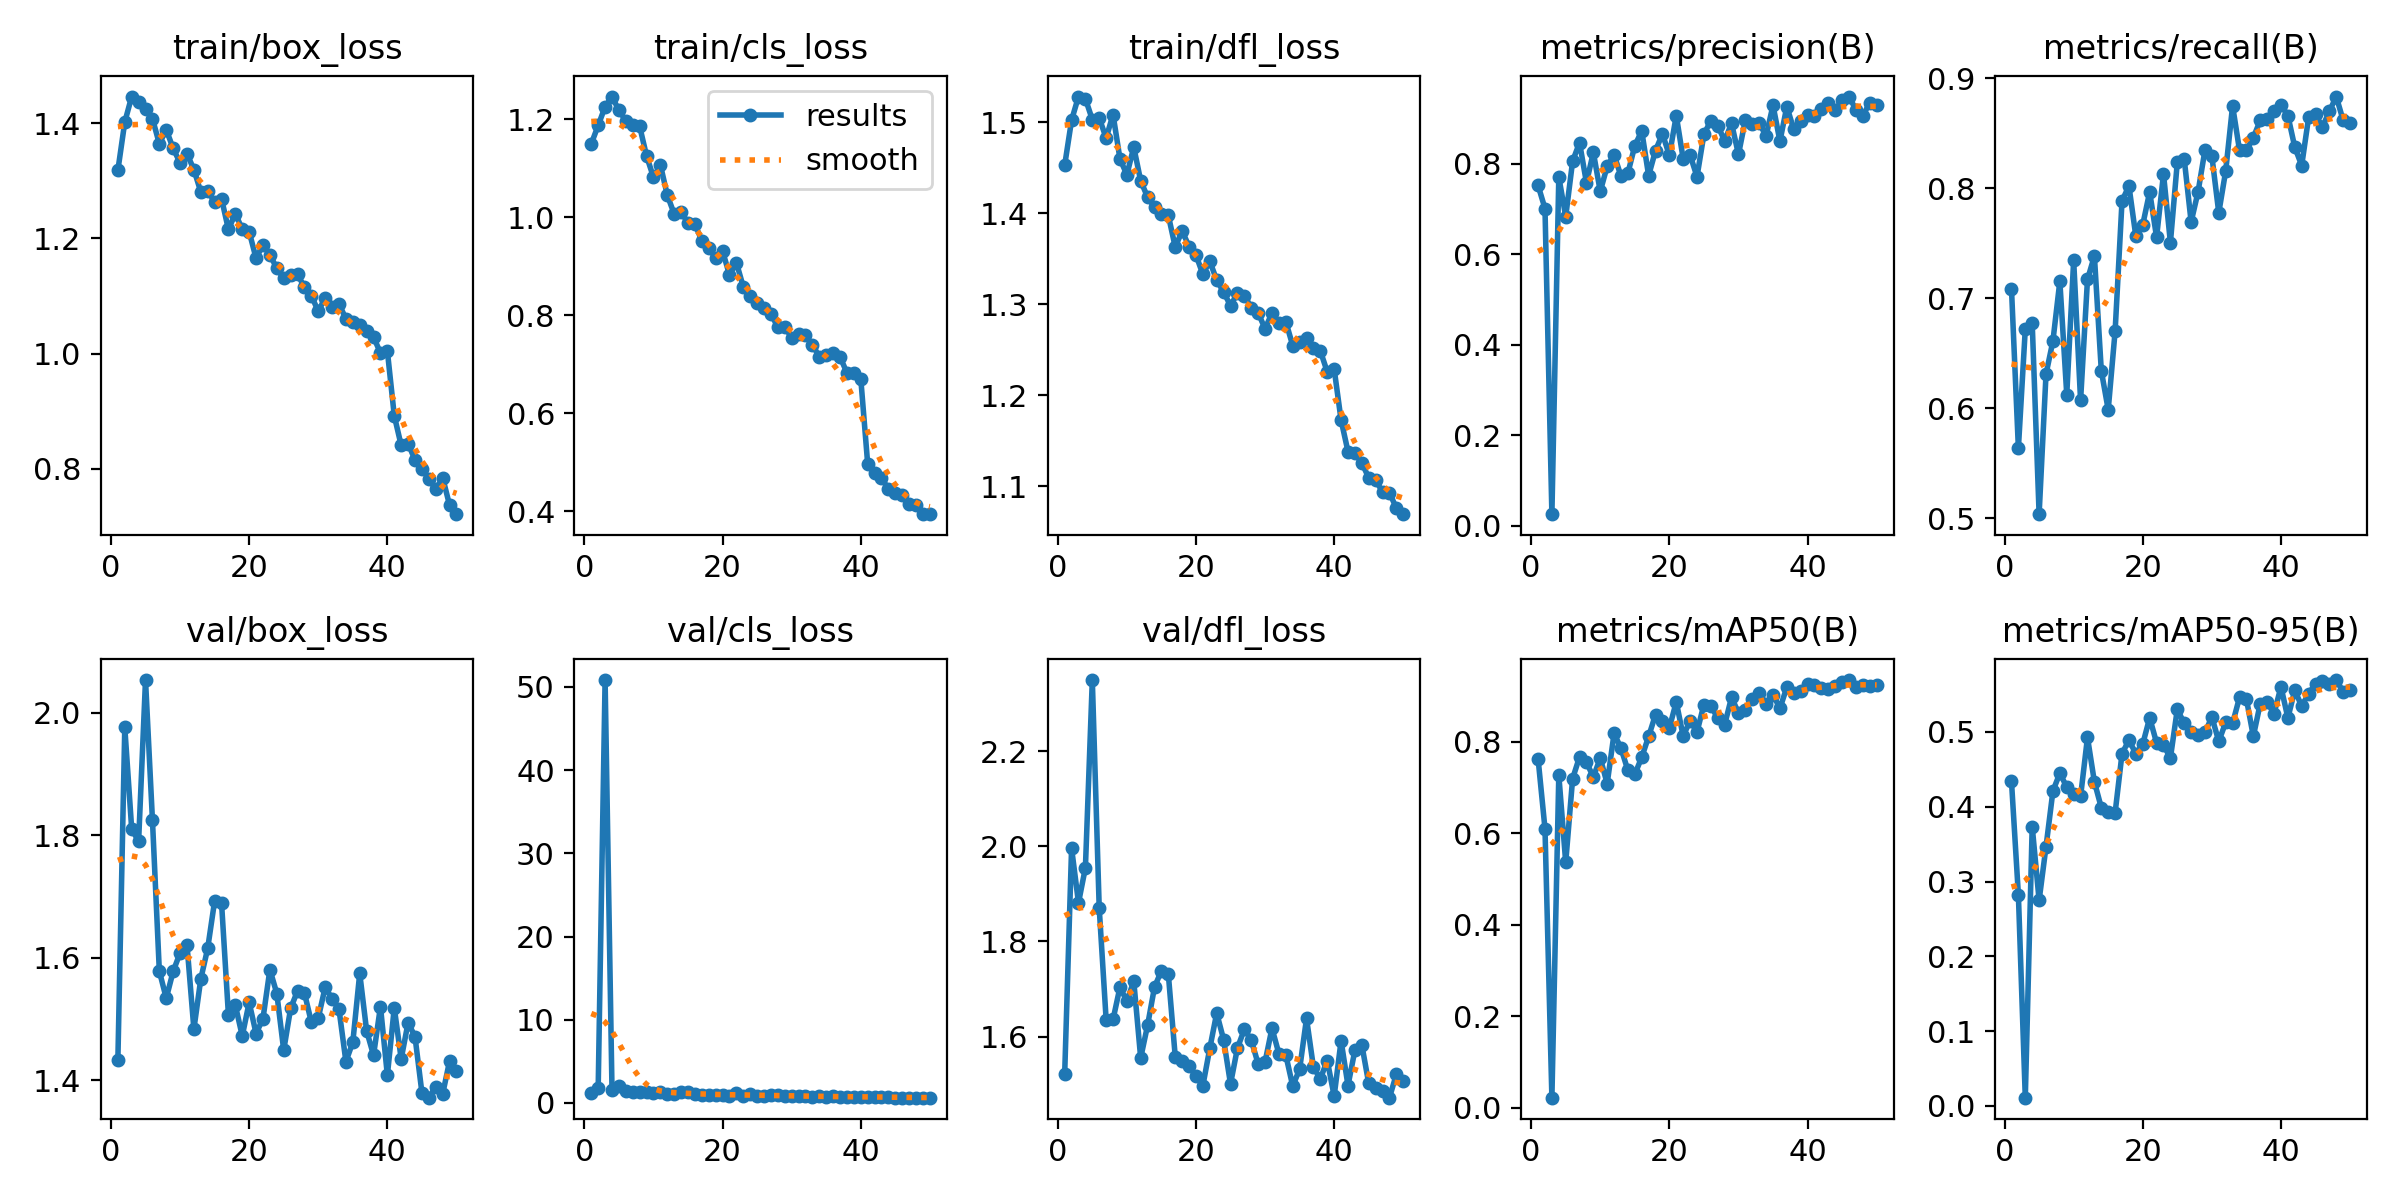

In [ ]:
from IPython.display import Image

# Display training results.png
Image(filename='runs/detect/train5/results.png', width=800)


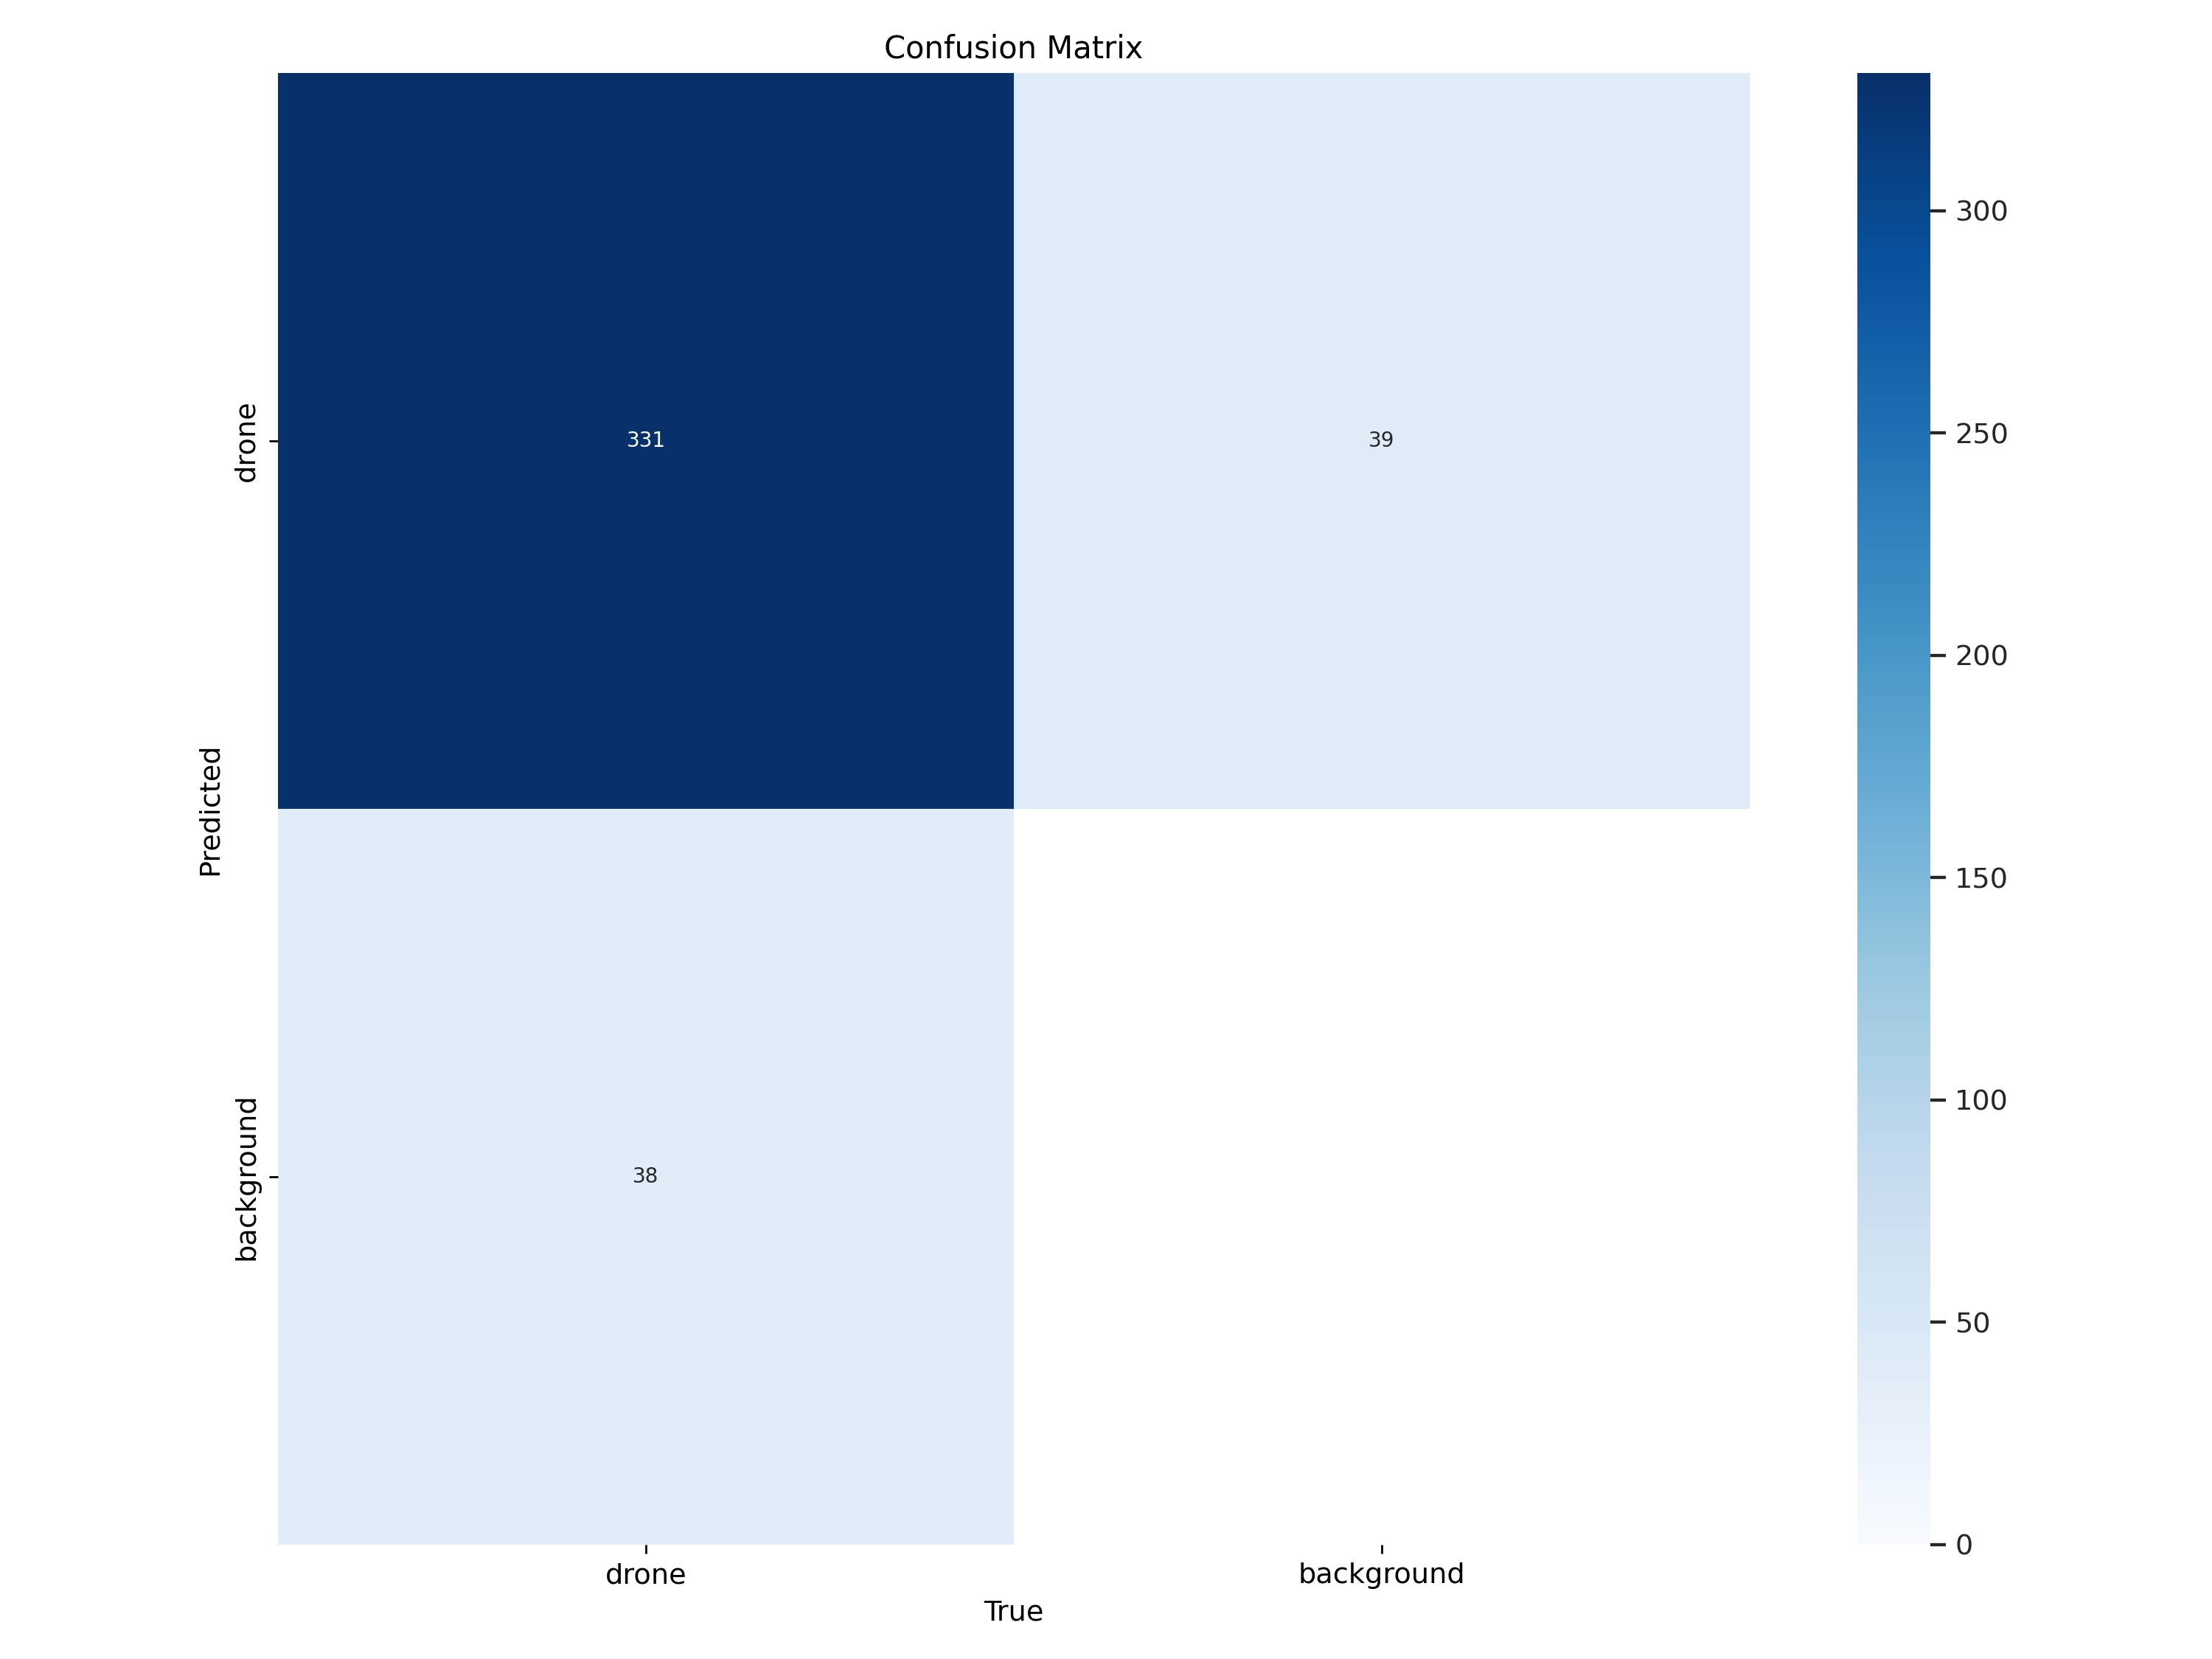

In [ ]:
Image(filename='runs/detect/train5/confusion_matrix.png', width=600)


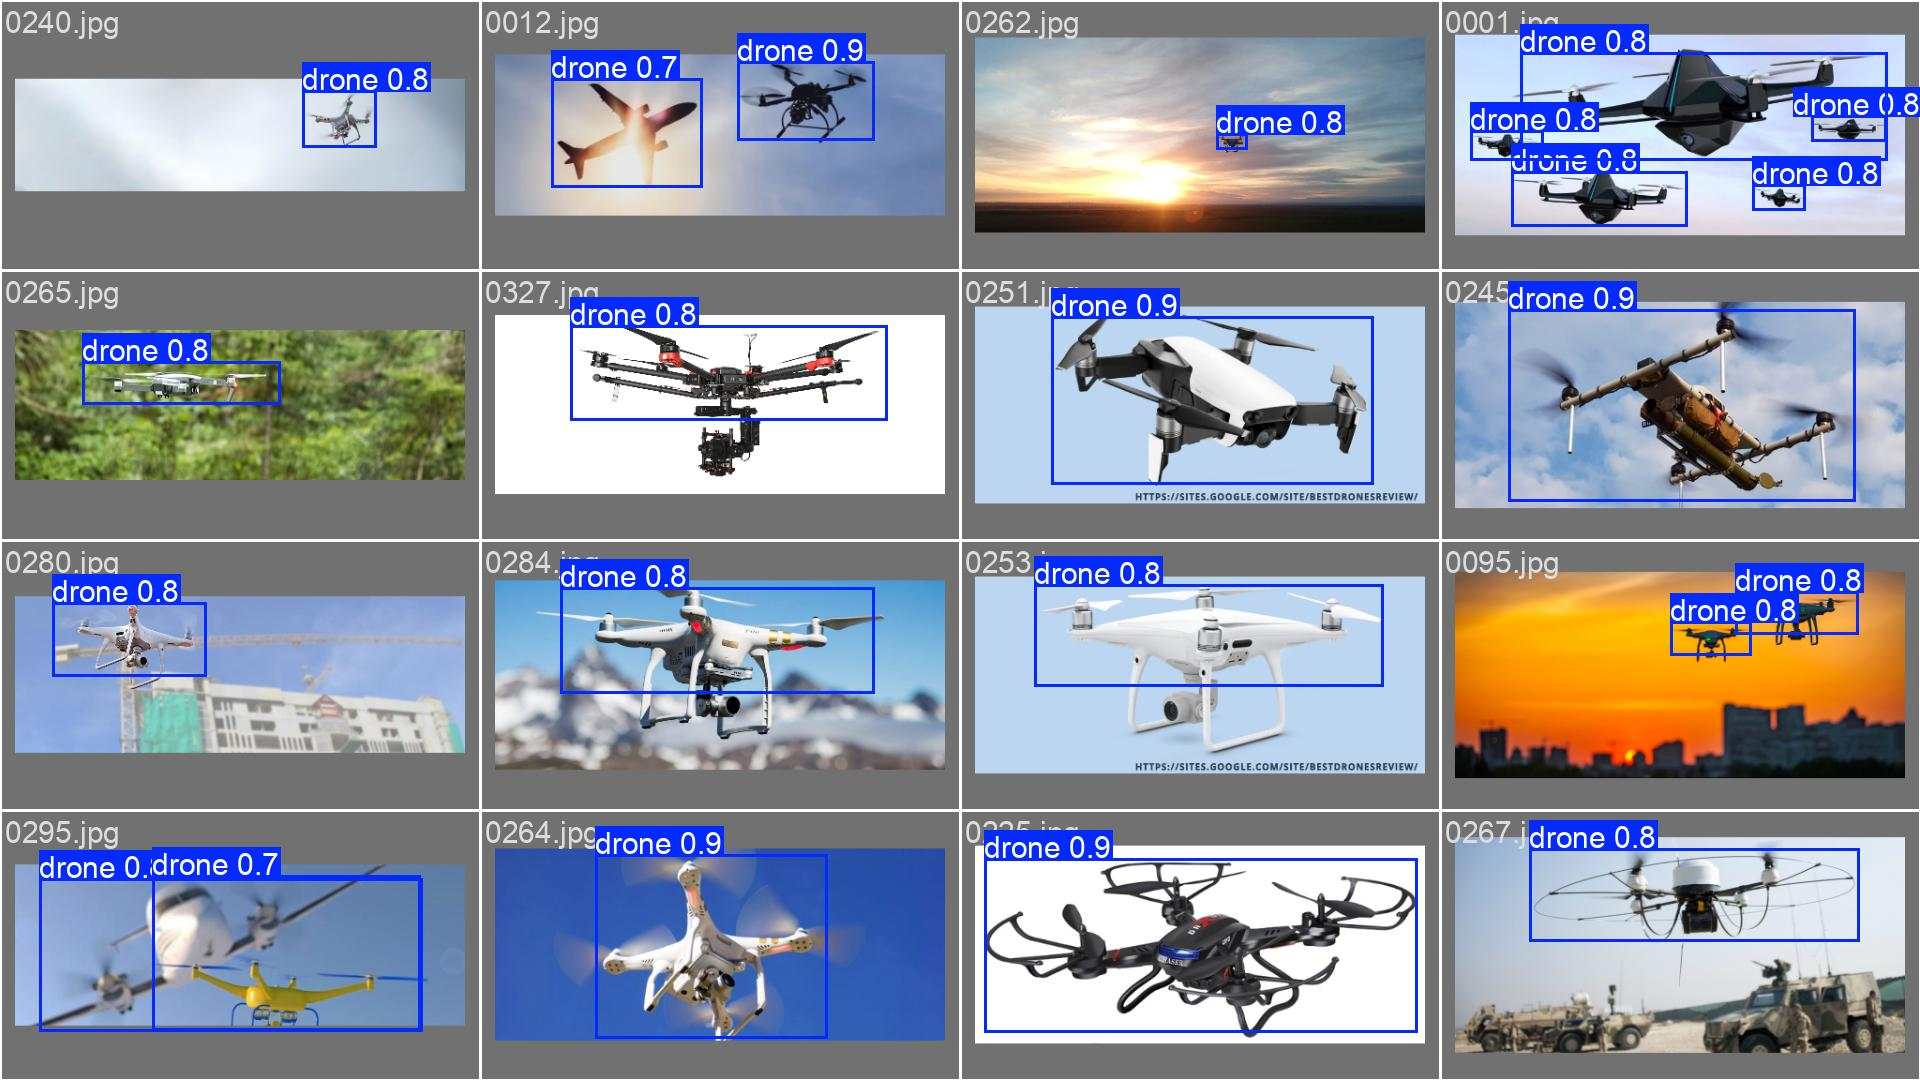

In [ ]:
Image(filename='runs/detect/train5/val_batch0_pred.jpg', width=800)


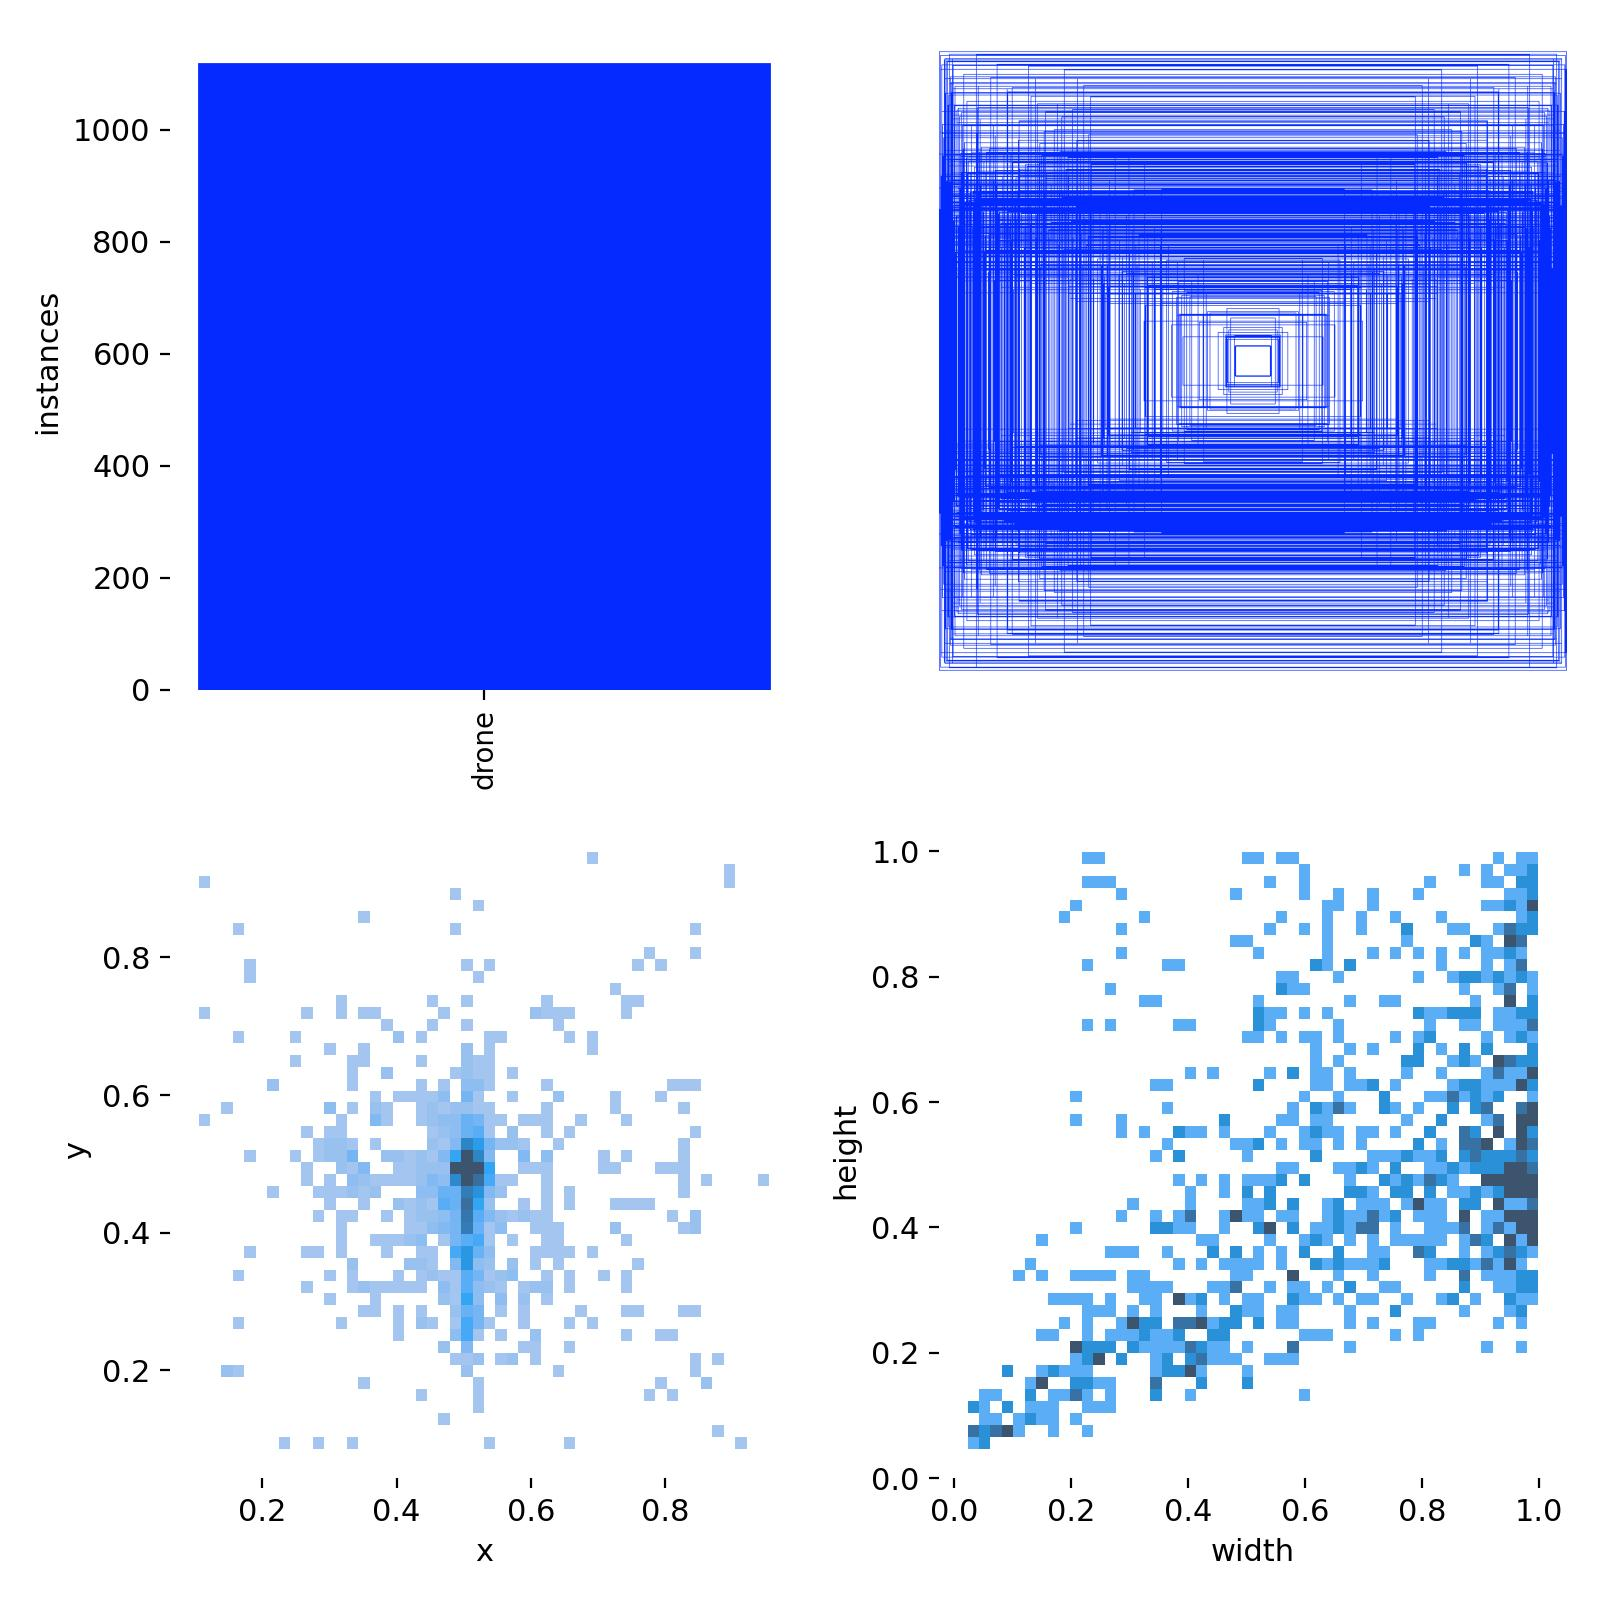

In [ ]:
Image(filename='runs/detect/train5/labels.jpg', width=800)


Code for Upload → Detect → Download (in Colab)

In [ ]:
from ultralytics import YOLO
from google.colab import files
import os
import shutil

# Load your trained model
model = YOLO('runs/detect/train5/weights/best.pt')  # You can also use 'last.pt'

# Upload image or video
uploaded = files.upload()

# Process each uploaded file
for file_name in uploaded.keys():
    ext = file_name.split('.')[-1].lower()
    if ext in ['jpg', 'jpeg', 'png', 'bmp']:  # Image detection
        results = model.predict(source=file_name, save=True, imgsz=480, conf=0.25)
        result_dir = 'runs/detect/predict'
        print(f"✅ Detection complete. File saved in {result_dir}")

        # Find the predicted image file
        # This assumes YOLO saves the predicted image with the same name in the result_dir
        result_img_path = os.path.join(result_dir, file_name)

        # Check if the file exists, if not find the actual predicted file
        if not os.path.exists(result_img_path):
            predicted_files = [f for f in os.listdir(result_dir) if f.startswith(file_name.split('.')[0]) and f.endswith(ext)]
            if predicted_files:
                result_img_path = os.path.join(result_dir, predicted_files[0])
            else:
                print(f"❌ Could not find predicted image for {file_name}")
                continue

        # Display result image
        from IPython.display import Image, display
        display(Image(filename=result_img_path))

        # Download result
        files.download(result_img_path)

    elif ext in ['mp4', 'mov', 'avi', 'mkv']:  # Video detection
        results = model.predict(source=file_name, save=True, imgsz=480, conf=0.25)
        result_dir = 'runs/detect/predict'

        # Find output video
        for fname in os.listdir(result_dir):
            if fname.endswith('.mp4'):
                output_path = os.path.join(result_dir, fname)
                print(f"🎥 Detection video saved at: {output_path}")
                files.download(output_path)
    else:
        print("❌ Unsupported file type. Please upload an image or video.")

Saving test.mp4 to test (3).mp4


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/192) /content/test (3).mp4: 480x288 1 drone, 46.8ms
video 1/1 (frame 2/192) /content/test (3).mp4: 480x288 2 drones, 45.8ms
video 1/1 (frame 3/192) /content/test (3).mp4: 480x288 1 drone, 42.3ms
video 1/1 (frame 4/192) /content/test (3).mp4: 480x288 1 drone, 31.2ms
video 1/1 (frame 5/192) /content/test (3).mp4: 480x288 2 drones, 31.2ms
video 1/1 (frame 6/192) /content/test (3).mp4: 480x288 1 drone, 31.

Code for Tracking a Drone in a Video:

In [ ]:
import os
from google.colab import files
from ultralytics import YOLO

# Upload video file from the user
uploaded = files.upload()  # This will prompt the user to upload a video
video_file = next(iter(uploaded))  # Get the name of the uploaded video file

# Load the trained YOLOv8 model
model = YOLO('runs/detect/train5/weights/best.pt')  # Replace with your model path

# Run tracking on the uploaded video
results = model.track(
    source=video_file,        # The uploaded video file
    persist=True,             # Keeps IDs across frames
    imgsz=480,                # Image size (adjust as per your setup)
    conf=0.25,                # Confidence threshold (you can adjust this)
    tracker='bytetrack.yaml', # Use ByteTrack (default tracker)
    save=True                 # Save output video with tracking
)

# List the files in the output directory to ensure the correct path
output_dir = '/content/runs'
print(f"Files in output directory: {os.listdir(output_dir)}")

# Get the processed video file name (it should have the same name as the uploaded video)
output_video_path = os.path.join(output_dir, video_file)

# Check if the file exists
if os.path.exists(output_video_path):
    print(f"Output video saved at: {output_video_path}")

    # Provide a download link for the resulting video
    files.download(output_video_path)  # Download the result video
else:
    print("Video file not found. Check the output path.")


Saving test.mp4 to test (4).mp4


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/192) /content/test (4).mp4: 480x288 1 drone, 46.7ms
video 1/1 (frame 2/192) /content/test (4).mp4: 480x288 1 drone, 45.7ms
video 1/1 (frame 3/192) /content/test (4).mp4: 480x288 1 drone, 45.1ms
video 1/1 (frame 4/192) /content/test (4).mp4: 480x288 1 drone, 29.6ms
video 1/1 (frame 5/192) /content/test (4).mp4: 480x288 1 drone, 29.6ms
video 1/1 (frame 6/192) /content/test (4).mp4: 480x288 1 drone, 29.6m

# Result of Training

In [ ]:
paths2=[]
for dirname, _, filenames in os.walk('/kaggle/working/runs/detect/train'):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths2+=[(os.path.join(dirname, filename))]
paths2=sorted(paths2)

In [ ]:
for path in paths2:
    image = Image.open(path)
    image=np.array(image)
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.show()

# Predict

In [ ]:
best_path0='runs/detect/train/weights/best.pt'
source0=os.path.join(test_path,'images')

In [ ]:
#test images
ppaths=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            ppaths+=[(os.path.join(dirname, filename))]
ppaths=sorted(ppaths)
#print(ppaths[0])
#print(len(ppaths))

In [ ]:
model2 = YOLO(/content/yolov8x.pt)

SyntaxError: invalid syntax (<ipython-input-39-3ece40bc5080>, line 1)

In [ ]:
!yolo task=detect mode=predict model={best_path0} conf=0.5 source={source0}

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 960, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1304, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

# Result of Prediction

In [ ]:
results = model2.predict(source0,conf=0.5)
print(len(results))

NameError: name 'model2' is not defined

PBOX for test predicted

In [ ]:
PBOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):#len(results)
    arri=pd.DataFrame(results[i].boxes.data.cpu().numpy()).astype(float)
    path=ppaths[i]
    file=path.split('/')[-1]
    arri=arri.assign(file=file)
    arri=arri.assign(i=i)
    PBOX=pd.concat([PBOX,arri],axis=0)

PBOX.columns=['x1','y1','x2','y2','confidence','class','file','i']
PBOX['class']=PBOX['class'].astype(int) #.apply(lambda x: class_map[int(x)])
PBOX['i']=PBOX['i'].astype(int)

PBOX=PBOX.reset_index(drop=True)
display(PBOX)

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

In [ ]:
def draw_box2(n0,ppaths,PBOX):

    ipath=ppaths[n0]
    image=cv2.imread(ipath)
    ipath0=ppaths[0]
    image0=cv2.imread(ipath0)
    W,H=image0[0:2]
    file=ipath.split('/')[-1]

    if PBOX[PBOX['file']==file] is not None:
        box=PBOX[PBOX['file']==file]
        box=box.reset_index(drop=True)
        #display(box)

        for i in range(len(box)):
            #conf=box.loc[i,'confidence']
            label=int(box.loc[i,'class'])
            x1=int(box.loc[i,'x1'])
            y1=int(box.loc[i,'y1'])
            x2=int(box.loc[i,'x2'])
            y2=int(box.loc[i,'y2'])
            #print(label,x,y,x2,y2)

            #cv2.putText(image, f'{round(conf,3)}', (x1, int(y1-4)),
            #            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0),1)

            cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2) #green

    #plt.imshow(image)
    #plt.show()

    return image

In [ ]:
def create_animation(ims):

    fig=plt.figure(figsize=(12,8))
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    text = plt.text(0.05, 0.05, f'Slide {0}', transform=fig.transFigure, fontsize=14, color='blue')
    plt.axis('off')
    plt.close()

    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        text.set_text(f'Slide {i}')
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

test images with prediced rectangles

In [ ]:
images2=[]
for i in tqdm(range(len(ppaths))):
    images2+=[draw_box2(i,ppaths,PBOX)]

#print('Test Predicted')
#create_animation(images2)

  0%|          | 0/347 [00:00<?, ?it/s]


KeyError: 'class'

# Process Test Annotation Data for Test True Data

In [ ]:
impaths=[]
txtpaths=[]
for dirname, _, filenames in os.walk(test_path):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        if path.endswith('.jpg'):
            impaths+=[path]
        elif path.endswith('.txt'):
            txtpaths+=[path]
impaths.sort()
txtpaths.sort()
impaths=np.array(impaths).tolist()
txtpaths=np.array(txtpaths).tolist()

In [ ]:
dirimg='/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/images'
boxdata=[]
for i in range(len(txtpaths)):#
    try:
        path=txtpaths[i]
        filename=path.split('/')[-1].split('.')[0]
        dfi=pd.read_csv(path,header=None)
        #display(dfi)
        ipath=os.path.join(dirimg,filename+'.jpg')
        image=cv2.imread(ipath)
        W,H=image.shape[0:2]  # use image size of each image

        file=ipath.split('/')[-1]
        #print(len(dfi))

        for j in range(len(dfi)):
            add0=dfi.iloc[j,0].split(' ')
            add1=[H,W,file,i]
            #print('add0',add0)
            #print('add1',add1)
            boxdata+=[add0+add1]
    except:
        continue

BOX for test true

In [ ]:
BOX=pd.DataFrame(data=boxdata,columns=['class','x_center','y_center','width','height','W','H','file','i'])
display(BOX)

In [ ]:
BOX['class']=BOX['class'].astype(int)
BOX['x_center']=BOX['x_center'].astype(float)
BOX['y_center']=BOX['y_center'].astype(float)
BOX['width']=BOX['width'].astype(float)
BOX['height']=BOX['height'].astype(float)
BOX['W']=BOX['W'].astype(int)
BOX['H']=BOX['H'].astype(int)
BOX['i']=BOX['i'].astype(int)

# Convert the coordinates in `BOX` from relative to absolute
BOX['x1'] = (BOX['x_center'] - BOX['width'] / 2) * BOX['W']
BOX['y1'] = (BOX['y_center'] - BOX['height'] / 2) * BOX['H']
BOX['x2'] = (BOX['x_center'] + BOX['width'] / 2) * BOX['W']
BOX['y2'] = (BOX['y_center'] + BOX['height'] / 2) * BOX['H']

display(BOX)

test images with true rectangles

In [ ]:
tpaths2=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            tpaths2+=[(os.path.join(dirname, filename))]
tpaths2=sorted(tpaths2)

timages2=[]
for i in tqdm(range(len(tpaths2))):
    timages2+=[draw_box2(i,tpaths2,BOX)]


# Comparison between true and predicted rectangles in test data

In [ ]:
print('Test True')
create_animation(timages2)

In [ ]:
print('Test Predicted')
create_animation(images2)

# Mean Average Precision (mAP)

In [ ]:
# IoU calculation function
def calculate_iou(pred_bbox, true_bbox):
    x1_pred, y1_pred, x2_pred, y2_pred = pred_bbox
    x1_true, y1_true, x2_true, y2_true = true_bbox

    # Calculate intersection area
    x1_inter = max(x1_pred, x1_true)
    y1_inter = max(y1_pred, y1_true)
    x2_inter = min(x2_pred, x2_true)
    y2_inter = min(y2_pred, y2_true)

    # Calculate areas
    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    pred_area = (x2_pred - x1_pred) * (y2_pred - y1_pred)
    true_area = (x2_true - x1_true) * (y2_true - y1_true)

    # IoU
    union_area = pred_area + true_area - inter_area
    iou = inter_area / union_area

    return iou,union_area, inter_area, pred_area, true_area

In [ ]:
# Matching predicted results with true labels based on image names
matched_results = []

for i, pred_row in PBOX.iterrows():
    true_data = BOX[BOX['file'] == pred_row['file']]
    true_bbox = [true_data['x1'].values[0], true_data['y1'].values[0],
                 true_data['x2'].values[0], true_data['y2'].values[0]]
    pred_bbox = [pred_row['x1'], pred_row['y1'], pred_row['x2'], pred_row['y2']]

    # Calculate IoU
    iou,union_area, inter_area, pred_area, true_area = calculate_iou(pred_bbox, true_bbox)

    if iou > 0.5:  # If IoU exceeds the threshold, it's a True Positive
        matched_results.append({'image': pred_row['file'], 'iou': iou,'union_area':union_area, 'inter_area':inter_area, 'pred_area':pred_area, 'true_area':true_area, 'tp': True})
    else:
        matched_results.append({'image': pred_row['file'], 'iou': iou,'union_area':union_area, 'inter_area':inter_area, 'pred_area':pred_area, 'true_area':true_area, 'tp': False})

# To calculate mAP, you would typically aggregate the results based on different confidence thresholds
# and calculate Precision-Recall curve for each class to get the AP.
# Here, we use a simple threshold of IoU > 0.5 for TP and FP counts.

    image: The image file name (e.g. n02085620_1862.jpg).
    iou: The IoU value with the corresponding Ground Truth box (range 0.0 to 1.0).
    tp: Indicates whether the prediction is True Positive (True) (FP if False).

In [ ]:
# Create a DataFrame for the matched results
matched_df = pd.DataFrame(matched_results)
display(matched_df)

NameError: name 'matched_results' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Check for NaNs
nan_values = matched_df['iou'].isna().sum()
print(f"Number of NaN values: {nan_values}")

# Check for infinite values
inf_values = np.isinf(matched_df['iou']).sum()
print(f"Number of infinite values: {inf_values}")

valid_iou_values = matched_df['iou'][np.isfinite(matched_df['iou'])]

plt.hist(valid_iou_values, bins=50)
plt.title("IoU Distribution")
plt.xlabel("IoU")
plt.show()

NameError: name 'matched_df' is not defined